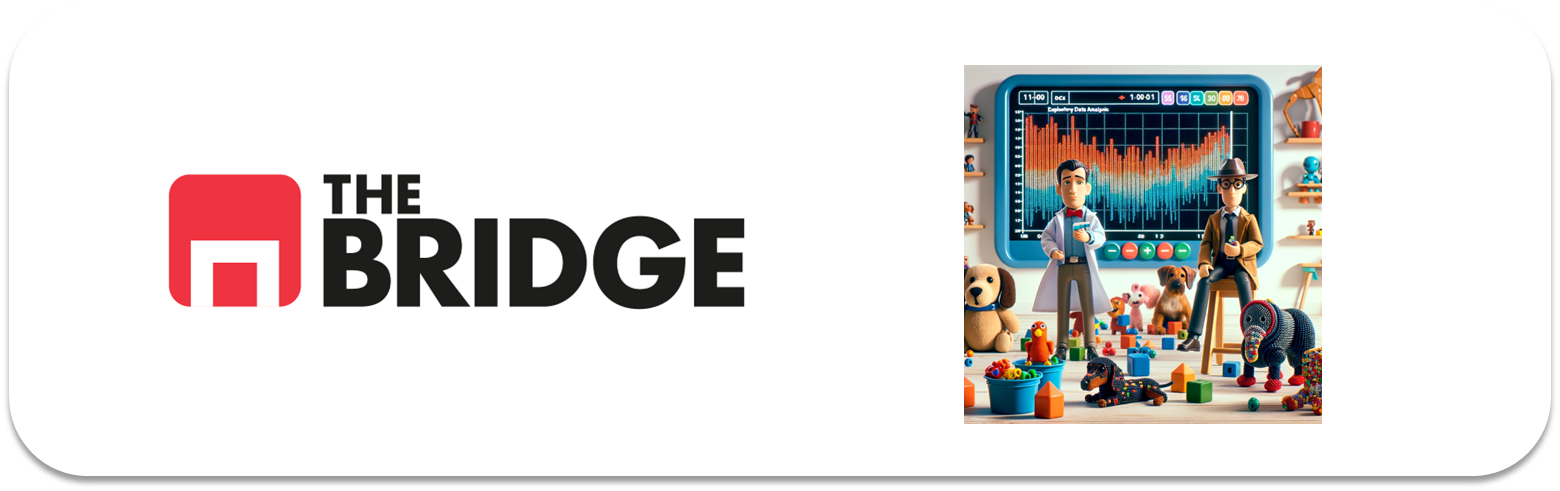

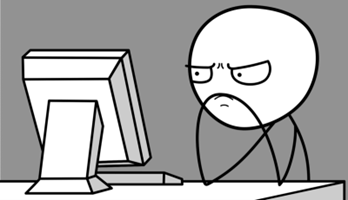

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import *

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [24]:
df_admisiones = pd.read_csv("./data/admission_data.csv")
df_admisiones = df_admisiones.drop(columns="Unnamed: 0")
df_admisiones.head()

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

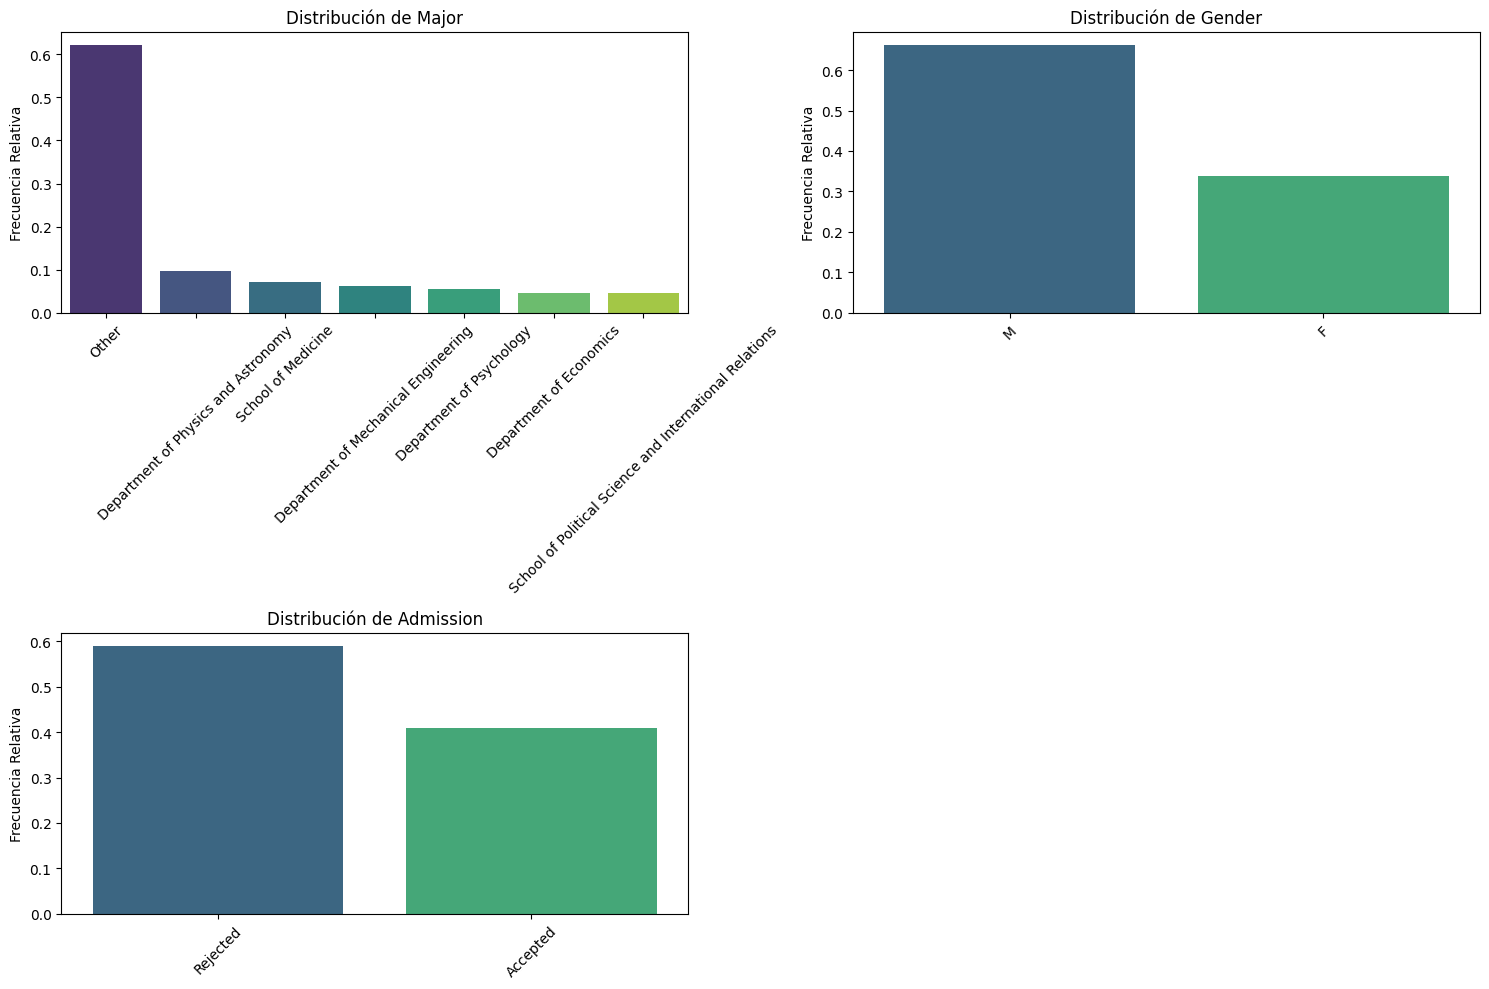

In [13]:
columnas_categoricas = ["Major","Gender","Admission"]
pinta_distribucion_categoricas(df_admisiones, columnas_categoricas, relativa=True)

In [9]:
columnas = ["Major","Gender","Admission"] 
col_directora = "Admission"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_admisiones[col_directora].unique():
    diccionario_multivariante[valor] = df_admisiones.loc[df_admisiones[col_directora] == valor,[col_2,col_1]]

Respuesta Rejected:


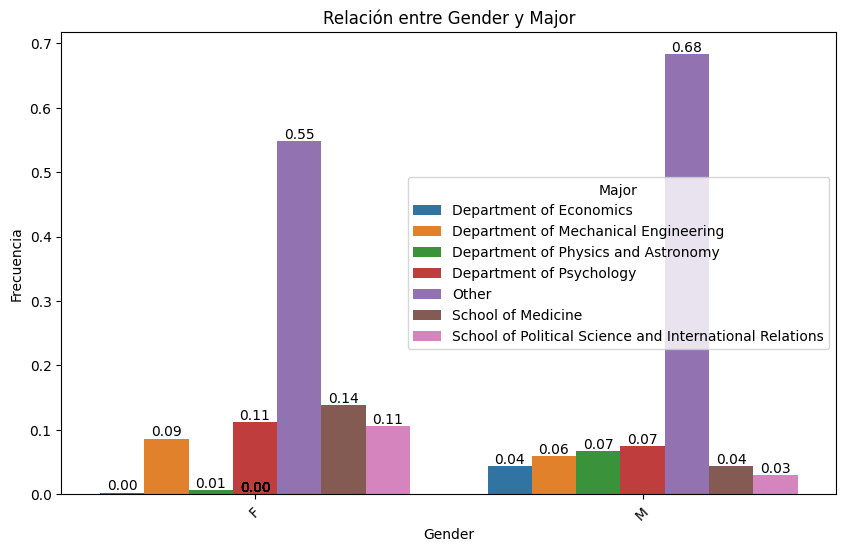

Respuesta Accepted:


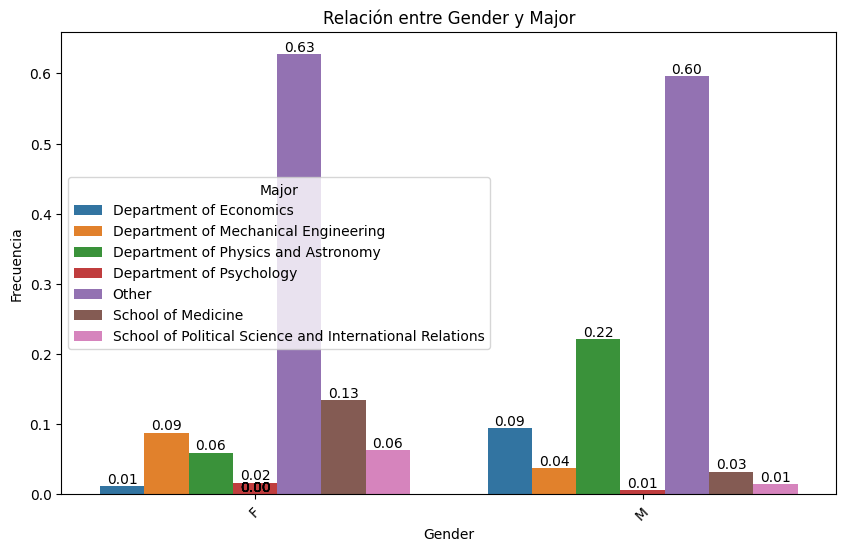

In [10]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

No se observa ningún tipo de discrimicación entre géneros en las `admisiones`. Aunque en los departamentos `Other` se observa que el género femenino tiene una mayor cantidad de admisiones aceptadas que los hombres, siendo los hombres una mayor cantidad de las admisiones totales.

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [23]:
df_propinas = pd.read_csv("./data/tips.csv")
df_propinas.drop(columns="Unnamed: 0", inplace=True)
df_propinas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [28]:
df_accidentes = pd.read_csv("./data/car_crashes.csv", sep="|")
df_accidentes.drop(columns="Unnamed: 0", inplace=True)
df_accidentes.rename(columns={"abbrev":"state"}, inplace=True)
df_accidentes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

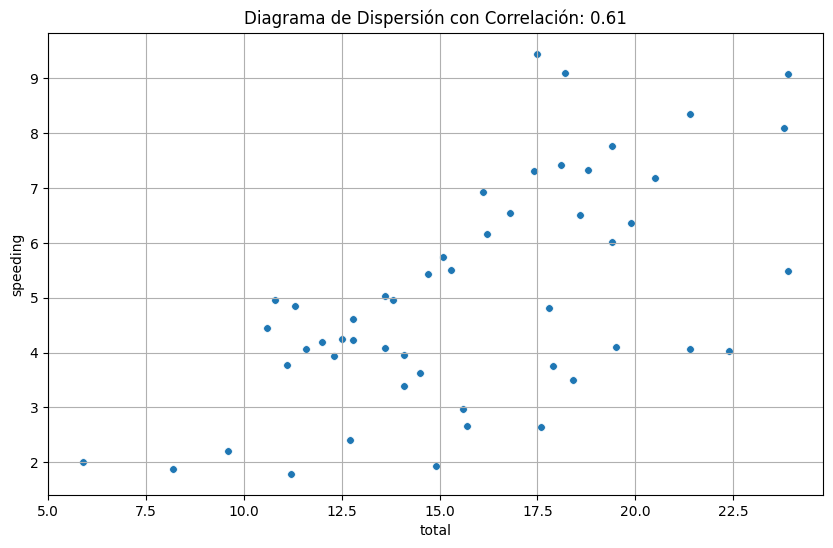

In [ ]:
grafico_dispersion_con_correlacion(df_accidentes,"total", "speeding", mostrar_correlacion= True, tamano_puntos= 30)

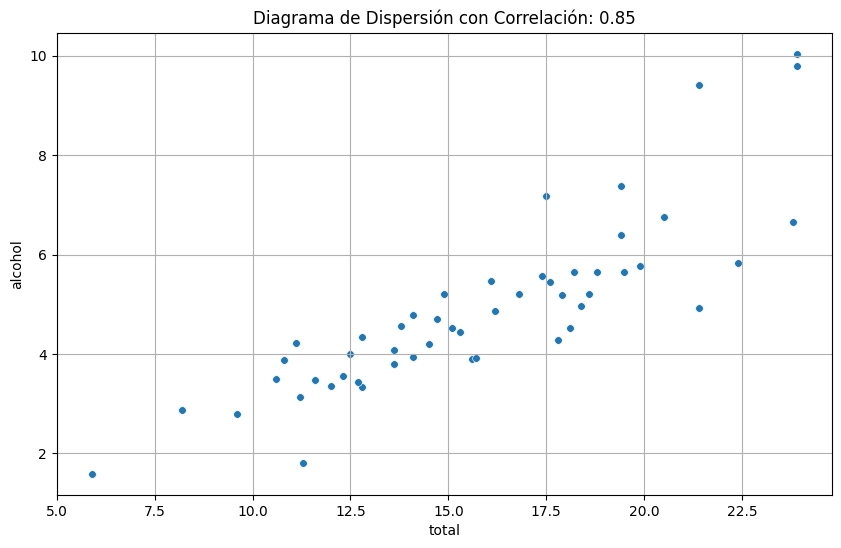

In [33]:
grafico_dispersion_con_correlacion(df_accidentes,"total", "alcohol", mostrar_correlacion= True, tamano_puntos= 30)

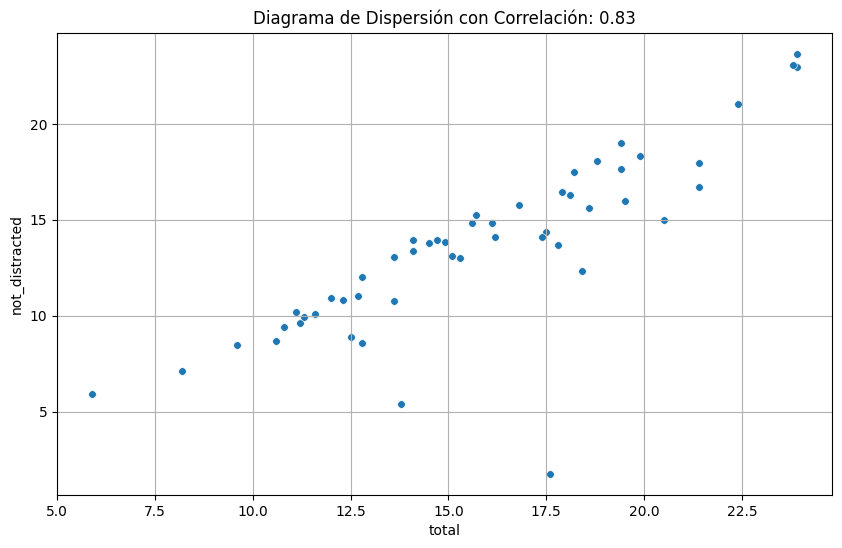

In [34]:
grafico_dispersion_con_correlacion(df_accidentes,"total", "not_distracted", mostrar_correlacion= True, tamano_puntos= 30)

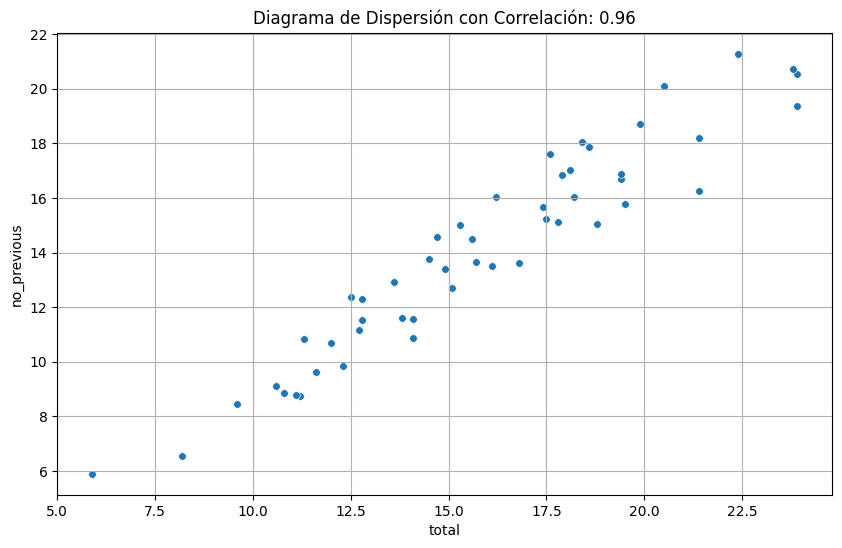

In [35]:
grafico_dispersion_con_correlacion(df_accidentes,"total", "no_previous", mostrar_correlacion= True, tamano_puntos= 30)

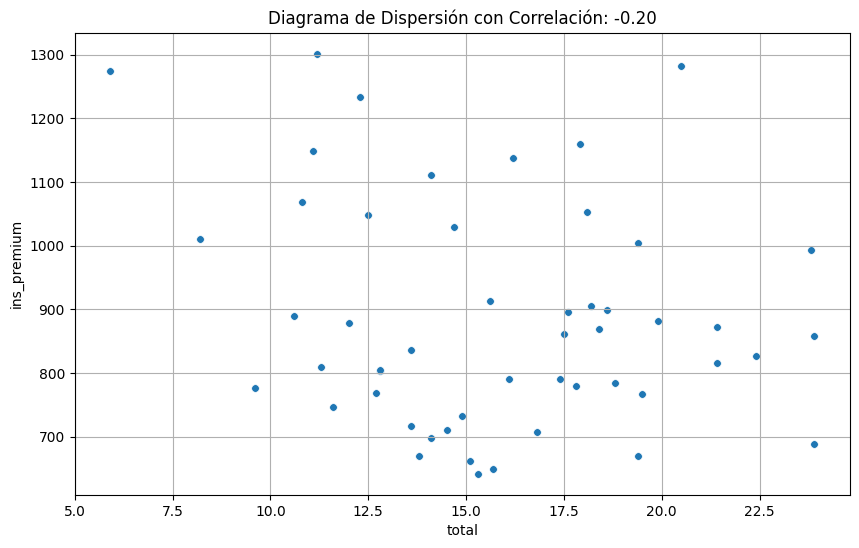

In [36]:
grafico_dispersion_con_correlacion(df_accidentes,"total", "ins_premium", mostrar_correlacion= True, tamano_puntos= 30)

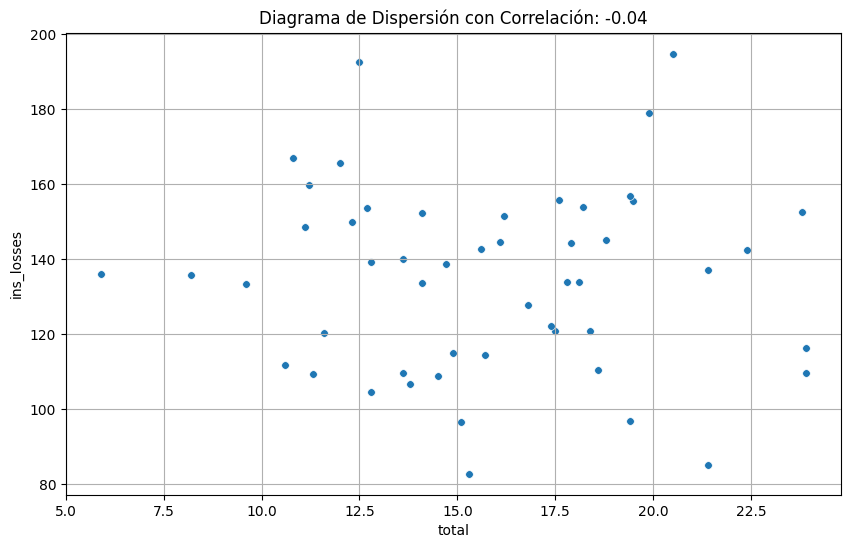

In [38]:
grafico_dispersion_con_correlacion(df_accidentes,"total", "ins_losses", mostrar_correlacion= True, tamano_puntos= 30)

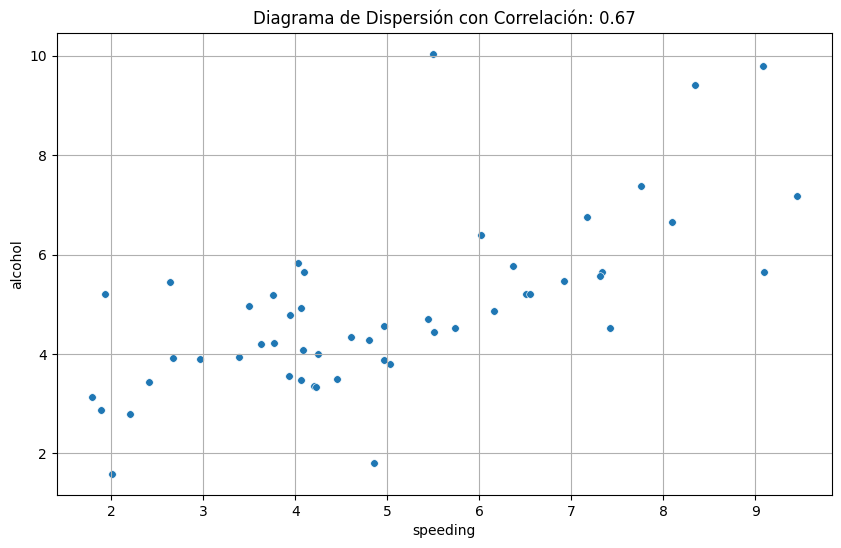

In [40]:
grafico_dispersion_con_correlacion(df_accidentes,"speeding", "alcohol", mostrar_correlacion= True, tamano_puntos= 30)

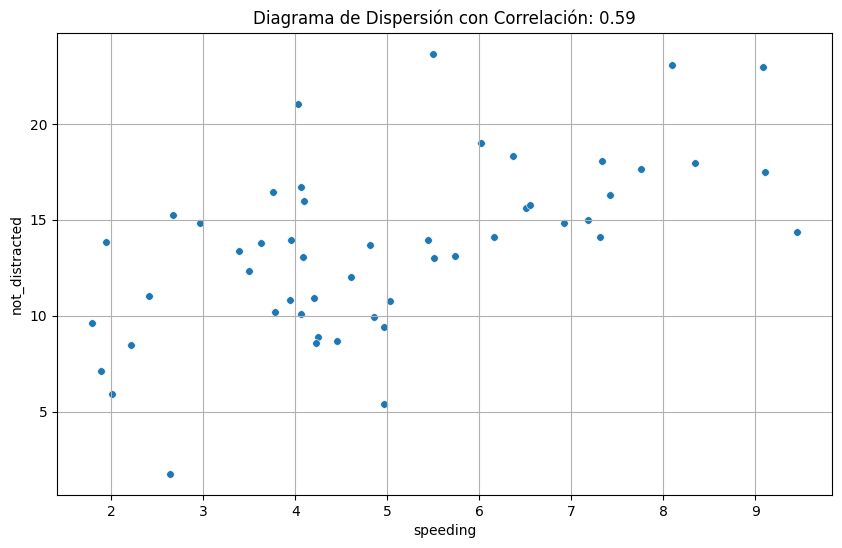

In [41]:
grafico_dispersion_con_correlacion(df_accidentes,"speeding", "not_distracted", mostrar_correlacion= True, tamano_puntos= 30)

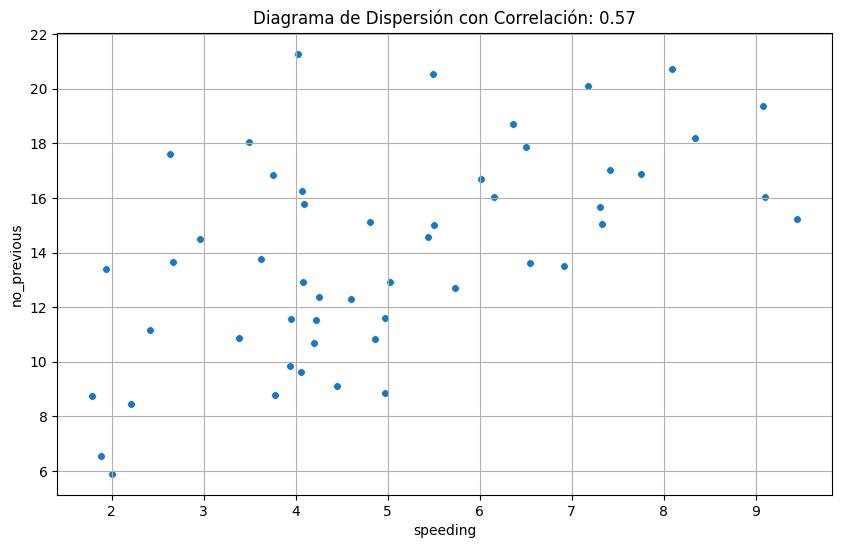

In [43]:
grafico_dispersion_con_correlacion(df_accidentes,"speeding", "no_previous", mostrar_correlacion= True, tamano_puntos= 30)

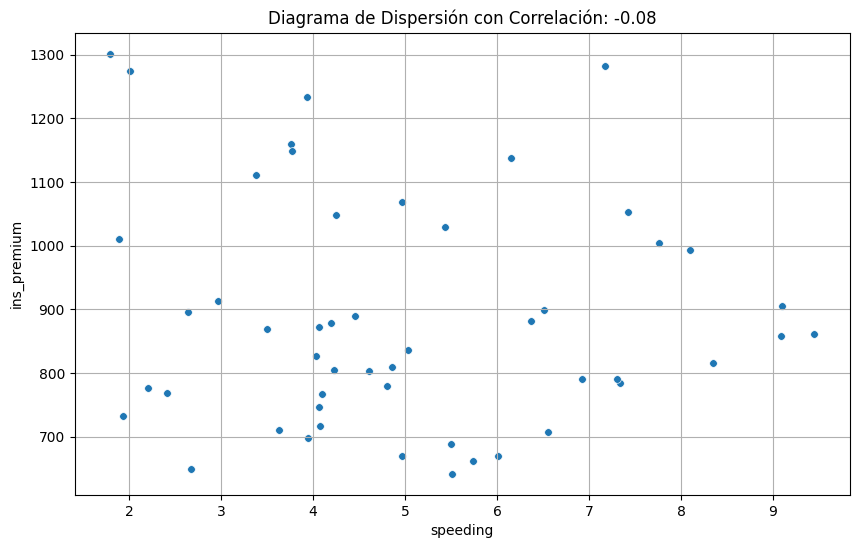

In [44]:
grafico_dispersion_con_correlacion(df_accidentes,"speeding", "ins_premium", mostrar_correlacion= True, tamano_puntos= 30)

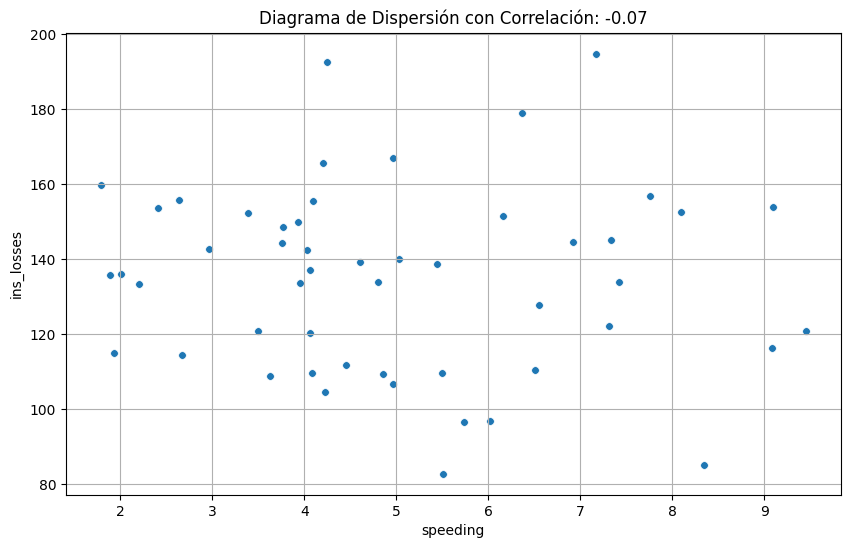

In [45]:
grafico_dispersion_con_correlacion(df_accidentes,"speeding", "ins_losses", mostrar_correlacion= True, tamano_puntos= 30)

In [47]:
corr_matrix = df_accidentes.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


## Mapa de calor

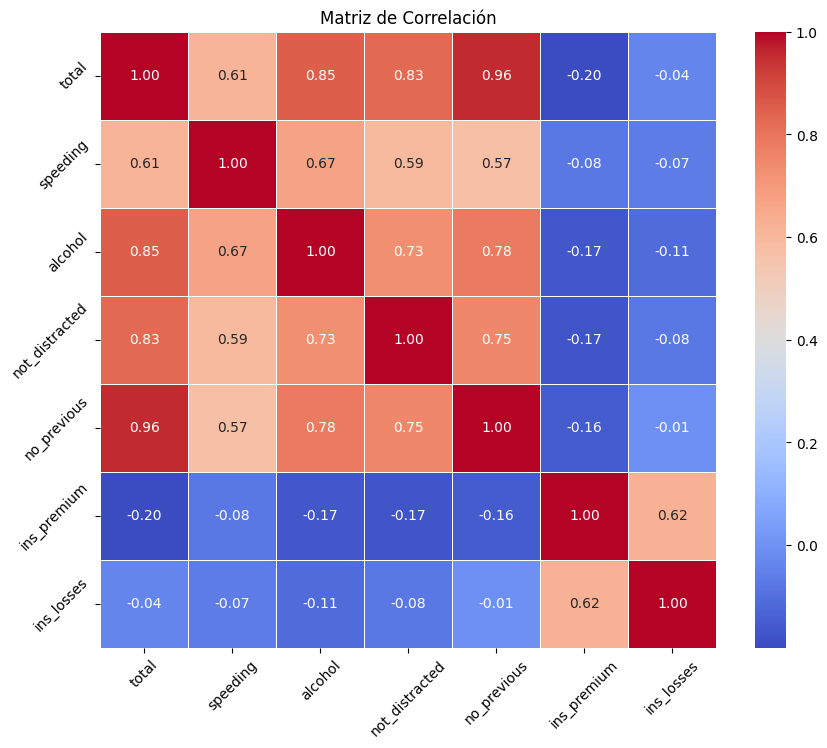

In [48]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

Todas las variables a excepción de `ins_losses` y `ins_premium` están relacionadas con `total`. Las que tienen mayor correlación son `total` y `no_previous`, esto nos dice que el total de dinero está muy relacionado con aquellos accidentes de personas que no han sufrido accidentes previamente.

## Pairplot de seaborn

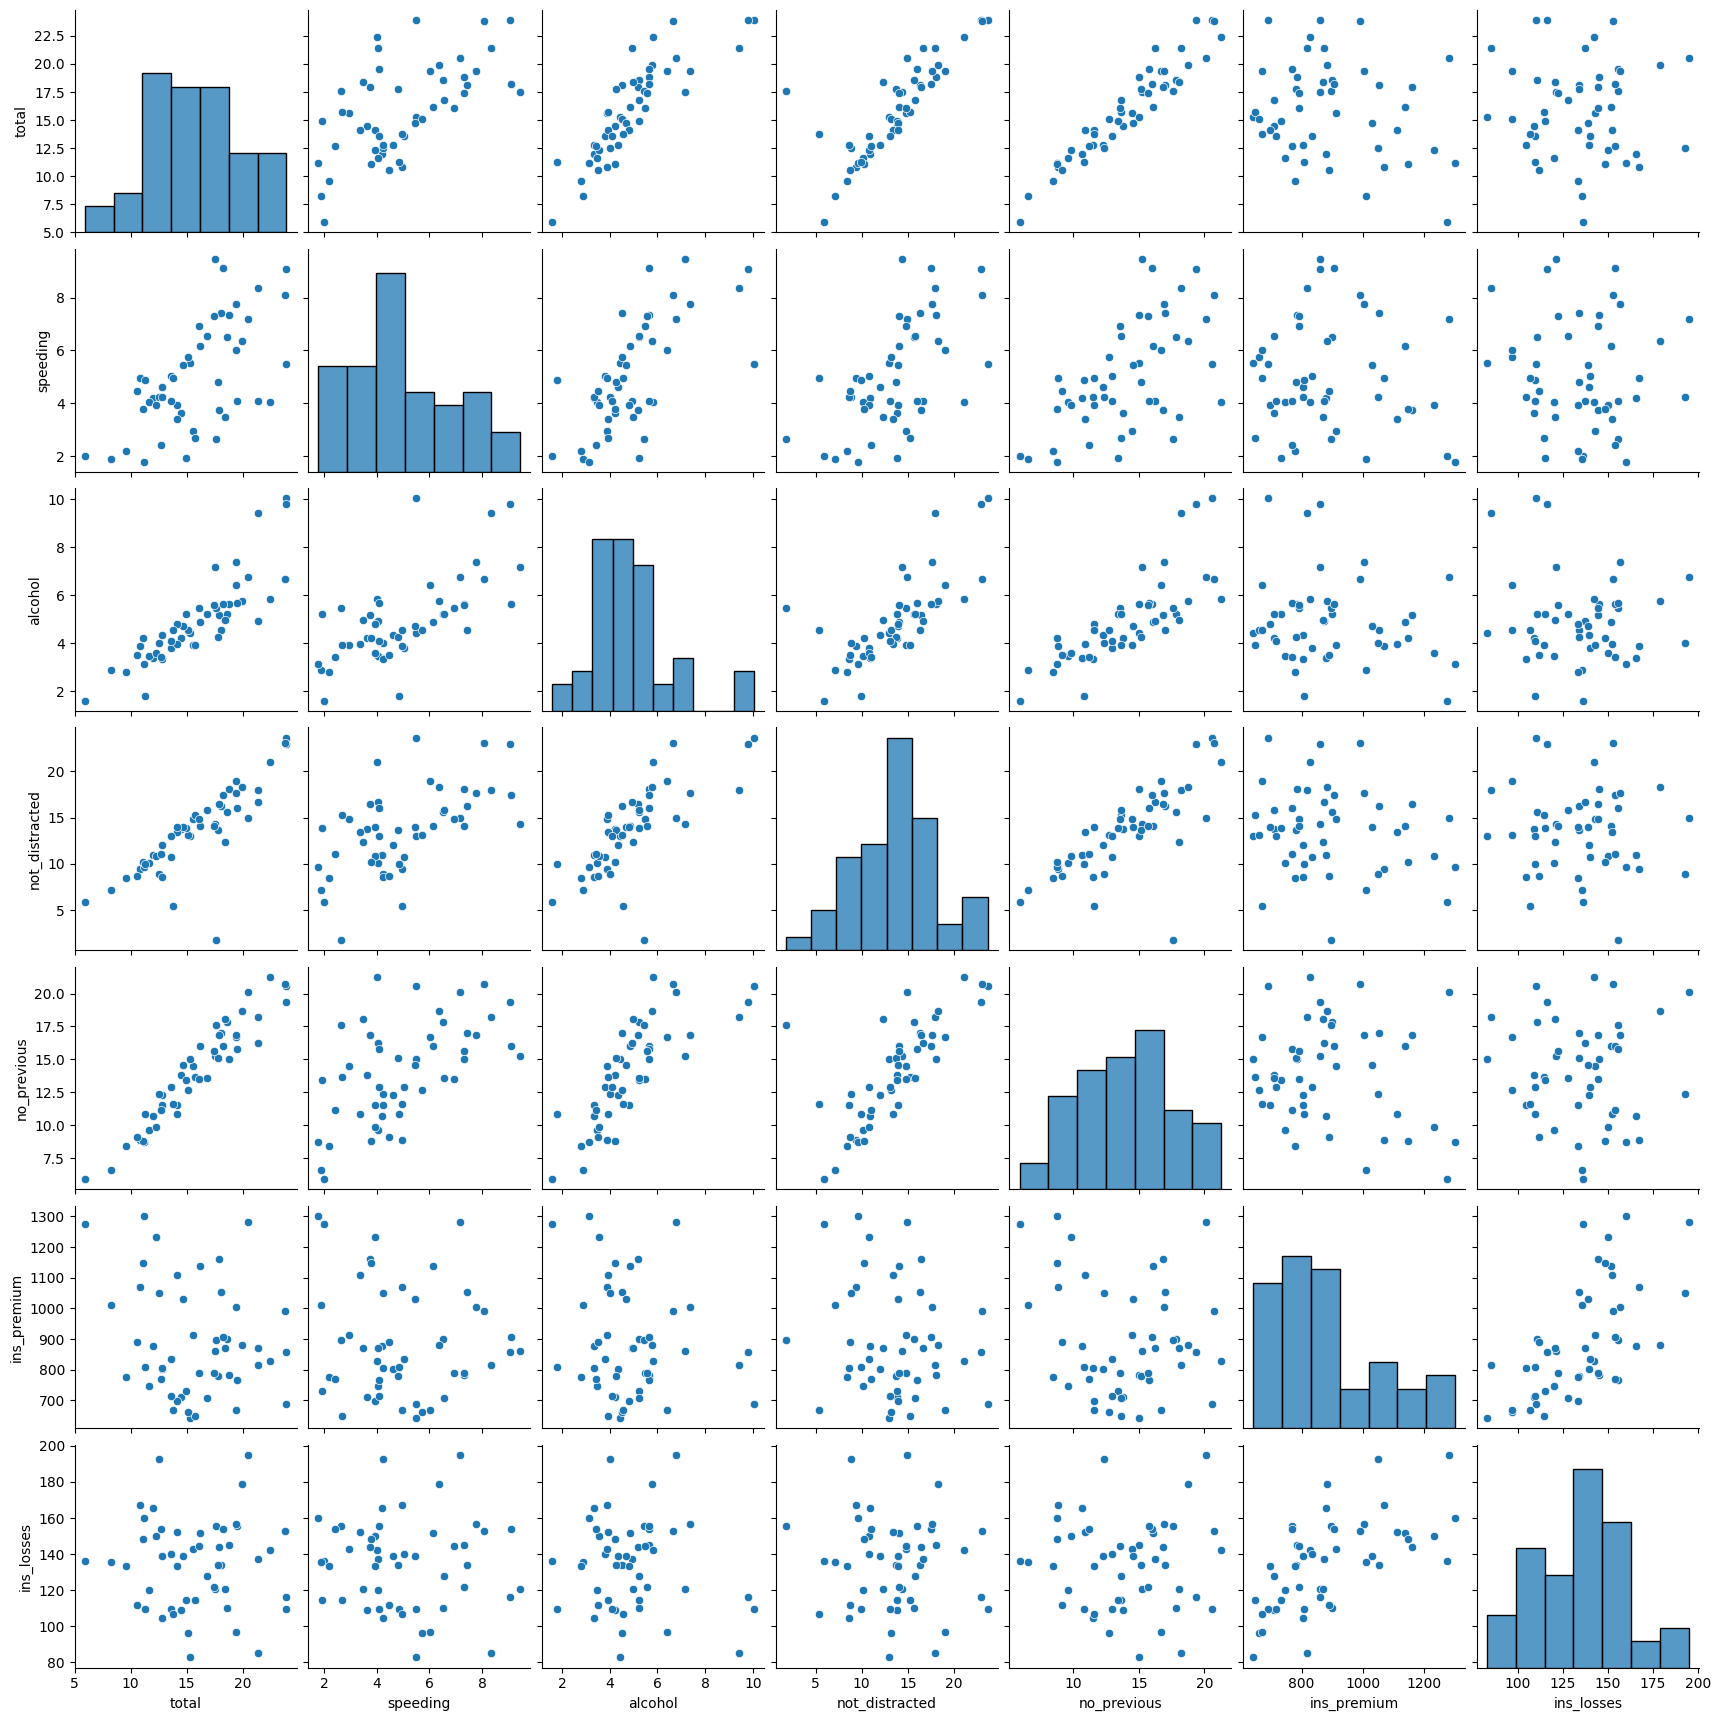

In [49]:
df_solo_numeros = df_accidentes.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

sns.pairplot(df_solo_numeros)
plt.show()

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

## Bubbleplot

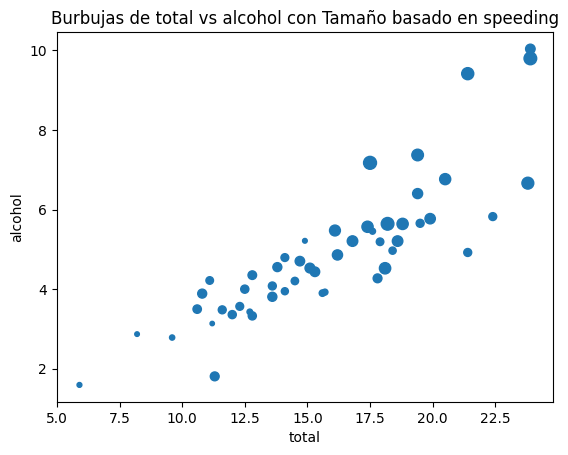

In [61]:
bubble_plot(df_accidentes,"total","alcohol","speeding", scale = 0.1)

Se puede ver una cierta relación entre `total` y `alcohol`. Cuanto mayor es el `total` mayor es la cantidad de alcohol.